In [ ]:
!unzip "/content/drive/MyDrive/rice.zip"

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [3]:
# Define constants
num_classes = 8
train_data_dir = '/content/final data/train'
validation_data_dir = '/content/final data/validation'
img_height, img_width = 640, 640
batch_size = 5
num_train_samples = 350
num_validation_samples = 100
epochs = 6

In [4]:
# Load Xception model
base_model = Xception(weights='imagenet', include_top=False)

# Add custom output layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Add a final softmax layer for classification

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess the input data
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)

83683744/83683744 [==============================] - 0s 0us/step


In [5]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 2193 images belonging to 8 classes.
Found 621 images belonging to 8 classes.


In [6]:
# Train the model
model.fit(train_generator, epochs=epochs, validation_data=validation_generator)


Epoch 1/6
439/439 [==============================] - 322s 681ms/step - loss: 0.9178 - accuracy: 0.6680 - val_loss: 2.1593 - val_accuracy: 0.6151
Epoch 2/6
439/439 [==============================] - 296s 674ms/step - loss: 0.4849 - accuracy: 0.8368 - val_loss: 0.2831 - val_accuracy: 0.9082
Epoch 3/6
439/439 [==============================] - 296s 674ms/step - loss: 0.2575 - accuracy: 0.9156 - val_loss: 0.2818 - val_accuracy: 0.9195
Epoch 4/6
439/439 [==============================] - 295s 671ms/step - loss: 0.1658 - accuracy: 0.9453 - val_loss: 0.2824 - val_accuracy: 0.9163
Epoch 5/6
439/439 [==============================] - 296s 673ms/step - loss: 0.1590 - accuracy: 0.9512 - val_loss: 0.0871 - val_accuracy: 0.9742
Epoch 6/6
439/439 [==============================] - 316s 719ms/step - loss: 0.0912 - accuracy: 0.9736 - val_loss: 0.0959 - val_accuracy: 0.9662


In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation accuracy: {:.2f}%".format(accuracy * 100))

125/125 [==============================] - 22s 174ms/step - loss: 0.0959 - accuracy: 0.9662
Validation accuracy: 96.62%


In [9]:
# Prediction
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

125/125 [==============================] - 24s 186ms/step


In [10]:
# Get class labels
class_labels = list(validation_generator.class_indices.keys())

In [11]:
# Print classification report
print("Classification Report:")
print(classification_report(validation_generator.classes, y_pred, target_names=class_labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(validation_generator.classes, y_pred))

Classification Report:
                       precision    recall  f1-score   support

Bacterial Leaf Blight       0.99      0.99      0.99        88
           Brown Spot       0.93      0.89      0.91        88
              Healthy       0.98      1.00      0.99        88
           Leaf Blast       0.95      0.92      0.94        88
          Leaf Blight       1.00      0.96      0.98        53
           Leaf Scald       0.99      1.00      0.99        88
            Leaf smut       0.89      0.97      0.93        40
    Narrow Brown Spot       0.98      1.00      0.99        88

             accuracy                           0.97       621
            macro avg       0.96      0.97      0.96       621
         weighted avg       0.97      0.97      0.97       621

Confusion Matrix:
[[87  0  0  0  0  0  0  1]
 [ 0 78  1  4  0  0  5  0]
 [ 0  0 88  0  0  0  0  0]
 [ 1  5  1 81  0  0  0  0]
 [ 0  0  0  0 51  1  0  1]
 [ 0  0  0  0  0 88  0  0]
 [ 0  1  0  0  0  0 39  0]
 [ 0  0  0 

In [7]:
# Save the trained model
model.save('xceptionv_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('xceptionv_model.h5')

1/1 [==============================] - 2s 2s/step


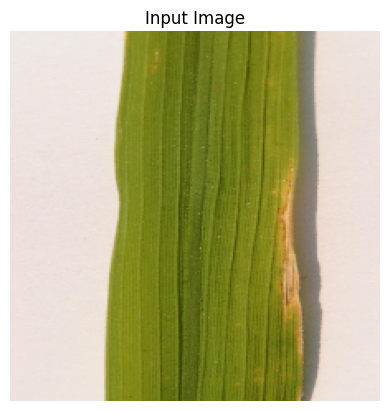

Predicted Class Index: 0
Predicted Class Name: Bacterial Leaf Blight


In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = tf.keras.models.load_model('xceptionv_model.h5')

# Load and preprocess the input image
img_path = '/content/bacterial_leaf_blight (1).JPG'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)

# Make prediction
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get the class name corresponding to the predicted class index
predicted_class_name = class_labels[predicted_class]

# Display the input image
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()

# Print predicted class index and its corresponding class name
print("Predicted Class Index:", predicted_class)
print("Predicted Class Name:", predicted_class_name)
